Andréia Molling, 00314622

In [1]:
from scipy.special import genlaguerre
import numpy as np
from scipy.special import sph_harm
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors
import scipy.integrate as integrate

In [2]:
def onda(x,y,z,n,l,m):
    
    a0 = 0.53
    
    r = np.sqrt(x**2+y**2+z**2)
    theta = np.arctan2(np.sqrt(x**2 + y**2), z)
    phi = np.arctan2(y, x)
    
    c = 2.0*r/(n*a0)
    lag = genlaguerre(n-l-1,2*l +1)(c)
    sph = sph_harm(m,l,phi,theta)
    
    R = np.sqrt((2/(n*a0))**3*math.factorial(n-l-1)/(2*n*math.factorial(n+l))) * np.exp(-c/2)* (c)**l *lag
    wf = R*sph
    wf = np.nan_to_num(wf)
    return wf

x2 = np.arange(-20, 20, 0.5)
y2 = np.arange(-20, 20, 0.5)
z2 = np.arange(-20, 20, 0.5)

x,y,z = np.meshgrid(x2, y2, z2)

Text(0.5, 1.0, 'n=4, l=2, m=1')

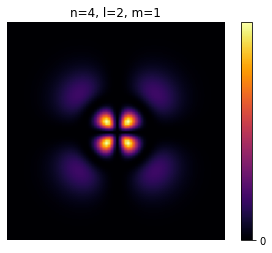

In [3]:
n = 4 
l = 2
m = 1

prob = onda(x,y,z, n, l, m)
prob = abs(prob)**2

fig, ax = plt.subplots()
plot = plt.imshow(prob[int((0-(-20))/0.5)], cmap='inferno')
aa = np.arange(0,100,10)
fig.colorbar(plot, ax=ax, ticks=aa)
plt.axis('off')
ax.set_title('n='+str(n)+', l='+str(l)+', m='+str(m))



Text(0.5, 1.0, 'n=3, l=2, m=1')

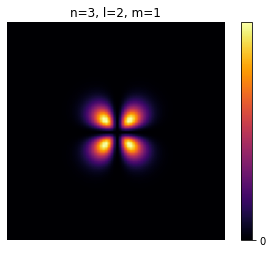

In [4]:
n = 3 
l = 2
m = 1

prob = onda(x,y,z, n, l, m)
prob = abs(prob)**2

fig, ax = plt.subplots()
plot = plt.imshow(prob[int((0-(-20))/0.5)], cmap='inferno')
aa = np.arange(0,100,10)
fig.colorbar(plot, ax=ax, ticks=aa)
plt.axis('off')
ax.set_title('n='+str(n)+', l='+str(l)+', m='+str(m))

<Figure size 432x288 with 0 Axes>

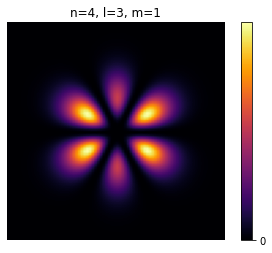

<Figure size 432x288 with 0 Axes>

In [5]:
n = 4 
l = 3
m = 1

prob = onda(x,y,z, n, l, m)
prob = abs(prob)**2

fig, ax = plt.subplots()
plot = plt.imshow(prob[int((0-(-20))/0.5)], cmap='inferno')
aa = np.arange(0,100,10)
fig.colorbar(plot, ax=ax, ticks=aa)
plt.axis('off')
ax.set_title('n='+str(n)+', l='+str(l)+', m='+str(m))
plt.figure()



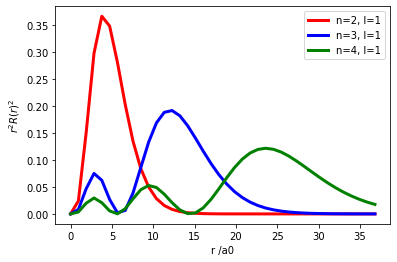

In [10]:
a0 = 0.53
def R(r,n,l):
    
    
    c = 2.0*r/(n*a0)
    lag = genlaguerre(n-l-1,2*l +1)(c)
    return np.sqrt((2/(n*a0))**3*math.factorial(n-l-1)/(2*n*math.factorial(n+l))) * np.exp(-c/2)* (c)**l *lag
n=2
l=1
L=[]
rlist = np.arange(0,20,0.5)
for i in rlist:
    L.append((R(i,n,l))**2*i**2)

rnew=[]
for i in rlist:
   rnew.append(i/a0)

plt.plot(rnew,L,label='n='+str(n)+', l='+str(l)+'', color='r', linewidth=3)

n=3
l=1
L1=[]
rlist = np.arange(0,20,0.5)
for i in rlist:
    L1.append((R(i,n,l))**2*i**2)
plt.plot(rnew,L1,label='n='+str(n)+', l='+str(l)+'', color='b', linewidth=3)

n=4
l=1
L2=[]
rlist = np.arange(0,20,0.5)
for i in rlist:
    L2.append((R(i,n,l))**2*i**2)
plt.plot(rnew,L2,label='n='+str(n)+', l='+str(l)+'', color='g', linewidth=3)

plt.ylabel('$r^2R(r)^2$')
plt.xlabel('r /a0')
plt.legend()


In [11]:
#2

area,er = integrate.quad(lambda r:r*r**2*(R(r,2,1)**2),0,np.inf)
area2,er = integrate.quad(lambda r:r*r**2*(R(r,3,1)**2),0,np.inf)
area3,er = integrate.quad(lambda r:r*r**2*(R(r,4,1)**2),0,np.inf)

print(' n=2 l=1, =',area,' \n n=3 l=1, =',area2,'\n n=4 l=1, =',area3)

 n=2 l=1, = 2.65  
 n=3 l=1, = 6.625 
 n=4 l=1, = 12.190000000000001


In [22]:
a0 = 0.53
def R(r,n,l):
    
    
    c = 2.0*r/(n*a0)
    lag = genlaguerre(n-l-1,2*l +1)(c)
    return np.sqrt((2/(n*a0))**3*math.factorial(n-l-1)/(2*n*math.factorial(n+l))) * np.exp(-c/2)* (c)**l *lag
n=2
l=1
L=[]
rlist = np.arange(0,20,0.5)
for i in rlist:
    L.append((R(i,n,l))**2*i**2)

rnew=[]
for i in rlist:
   rnew.append(i/a0)

for i in range(len(L)):
    if L[i] == max(L):
        print('n=2 l=1, r mais provável',rnew[i]*np.sqrt(1/3))

n=2 l=1, r mais provável 2.1786802610929272


In [84]:
#3 
for i in range(len(L)):
    if L[i] == max(L):
        print('n=2 l=1, r mais provável',rnew[i])
        
for i in range(len(L1)):
    if L1[i] == max(L1):
        print('n=3 l=1, r mais provável',rnew[i])
        
for i in range(len(L2)):
    if L2[i] == max(L2):
        print('n=4 l=1, r mais provável',rnew[i])
        
print('Pelo modelo de Bohr, a probabilidade de encontrar o elétron vai decaindo, e também o modelo é simétrico')     

n=2 l=1, r mais provável 3.773584905660377
n=3 l=1, r mais provável 12.264150943396226
n=4 l=1, r mais provável 23.58490566037736
Pelo modelo de Bohr, a probabilidade de encontrar o elétron vai decaindo, e também o modelo é simétrico


In [103]:


area,er = integrate.quad(lambda r:-1.6e-19**2*a0/(4*np.pi*8.85e-12)*(1/r)*(R(r,2,1)**2)*r**2*1e10*1e19,0,np.inf)
area2,er = integrate.quad(lambda r:-1.6e-19**2*a0/(4*np.pi*8.85e-12)*(1/r)*(R(r,3,1)**2)*r**2*1e10*1e19,0,np.inf)
area3,er = integrate.quad(lambda r:-1.6e-19**2*a0/(4*np.pi*8.85e-12)*(1/r)*(R(r,4,1)**2)*r**2*1e10*1e19,0,np.inf)

print('Energia potencial média é:')
print(' n=2 l=1', area,'eV \n n=3 l=1',area2,'eV \n n=4 l=1' ,area3,'eV')

Energia potencial média é:
 n=2 l=1 -5.7547550044527105 eV 
 n=3 l=1 -2.557668890867872 eV 
 n=4 l=1 -1.4386887511131774 eV


In [104]:
#energia total
e1 = -13.6/2**2
e2 = -13.6/3**2
e3 = -13.6/4**2


print('Energia cinética é', e1 -area,'eV n=2 l=1')
print('Energia cinética é', e2 -area2 ,'eV n=3 l=1')
print('Energia cinética é', e3 -area3,'eV n=4 l=1')

Energia cinética é 2.3547550044527106 eV n=2 l=1
Energia cinética é 1.046557779756761 eV n=3 l=1
Energia cinética é 0.5886887511131774 eV n=4 l=1
